# Cat vs. Dog Classification
### Colin Santos and Cynthia Lai
---

Loading in Train and Test Images
-----

In [2]:
import os
# import tensorflow as tf
import numpy as np
# import keras
# from random import shuffle
# from tqdm import tqdm
from PIL import Image

In [3]:
def get_train_label(file_name):
    """Gives binary based on image name"""
    category = file_name.split('.')[0]
    if   category == 'cat': return 0 # [1, 0]
    elif category == 'dog': return 1 # [0, 1]

In [5]:
test_directory = 'test1/' # may change on your laptop and mine

# Form list of testing images
test_dir_files   = os.listdir(test_directory)
# Remove hidden MAC files
# test_dir   = [i for i in test_dir if i!= '.DS_Store' ]
# Convert to grayscale 224 x 224 images 
# !!! Modify image augmentation/normalization as necessary !!!
test_im_list = [Image.open(test_directory + im).convert("L").resize((224,224)) for im in test_dir_files]

In [28]:
test_dir_files[0:5]

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg']

If you want to display an image, you can just list it out *(i.e. test_im_list[30])*
However, if you are working on terminal, you have to do *{img file}.show()*

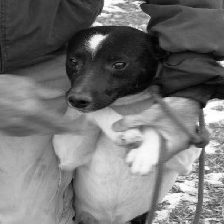

In [25]:
test_im_list[0]

In [6]:
train_directory = 'train/'
# Form list of training images names
train_dir_files  = os.listdir(train_directory)
# Remove hidden MAC files
# train_dir     = [i for i in train_dir if i!= '.DS_Store' ]
# Convert to grayscale 50 x 50 images
# !!! Modify image augmentation/normalization as necessary !!!
train_im_list = [Image.open(train_directory + im).convert("L").resize((224,224)) for im in train_dir_files]

In [7]:
# Get training labels 
train_labels = [get_train_label(file) for file in train_dir_files]

# Get testing numbers (file names) 
test_numbers = [file_name.split('.')[0] for file_name in test_dir_files]

In [35]:
(train_labels[0:5], train_labels[20000:20005])

([0, 0, 0, 0, 0], [1, 1, 1, 1, 1])

In [8]:
# Formatted data as (numpy arrays of) list of tuples of modified image and respective label or number
train_data = [(np.array(train_im), np.array(train_label)) for (train_im, train_label) in zip(train_im_list, train_labels)]
test_data  = [(np.array(test_im), np.array(test_number)) for (test_im, test_number) in zip(test_im_list, test_numbers)]

Convolutional Neural Network
----

In [9]:
import tensorflow as tf
import keras
from imagenet_utils import decode_predictions
from imagenet_utils import preprocess_input
from vgg16 import VGG16

#### First, work with VGG16 model.

In [ ]:
# train_data and test_data are 2 lists of np.array images
# need to preprocess images a bit more first

# make img file (1, 3, 224, 224)
train_data = [preprocess_input(np.expand_dims(image, axis = 0)) for image in train_data]
test_data = [preprocess_input(np.expand_dims(image, axis = 0)) for image in test_data]

In [ ]:
# load model
model = VGG16(weights="imagenet")

In [ ]:
# classify the image
preds = [model.predict(image) for image in train_data]

(inIDs, labels) = [decode_predictions(pred)[0] for pred in preds]

_Need opencv to use the below code._

In [ ]:
# display the predictions to our screen
print("ImageNet ID: {}, Label: {}".format(inID, label))
cv2.putText(orig, "Label: {}".format(label), (10, 30),
	cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
cv2.imshow("Classification", orig)
cv2.waitKey(0)

#### Next Steps:
1. Take **labels** and figure out if cat or dog based on classification output list.
2. Calculate accuracy.
3. Modify model if needed.
4. Try on other CNNs.
5. profit